In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import illustris_python as il

In [3]:
basePath = '/Users/forero/illustris-3/'

In [4]:
halos = il.groupcat.loadHalos(basePath,135)
subhalos = il.groupcat.loadSubhalos(basePath,135)

In [5]:
print halos.keys()
print subhalos.keys()

[u'Group_M_Crit200', u'Group_R_Mean200', u'GroupMass', u'Group_M_Mean200', u'GroupStarMetallicity', u'GroupVel', u'GroupBHMass', u'GroupMassType', u'Group_R_Crit200', u'GroupFirstSub', u'GroupSFR', u'GroupPos', u'Group_M_TopHat200', u'Group_M_Crit500', u'GroupCM', u'Group_R_Crit500', u'GroupNsubs', u'GroupLenType', u'GroupGasMetallicity', 'count', u'GroupBHMdot', u'GroupWindMass', u'Group_R_TopHat200', u'GroupLen']
[u'SubhaloPos', u'SubhaloBHMdot', u'SubhaloVmax', u'SubhaloWindMass', u'SubhaloGasMetallicityMaxRad', u'SubhaloVelDisp', u'SubhaloSFR', u'SubhaloStarMetallicityMaxRad', u'SubhaloLen', u'SubhaloSFRinHalfRad', u'SubhaloStellarPhotometrics', u'SubhaloGasMetallicity', u'SubhaloBHMass', u'SubhaloIDMostbound', u'SubhaloMassType', u'SubhaloStellarPhotometricsMassInRad', u'SubhaloHalfmassRad', u'SubhaloParent', u'SubhaloSpin', u'SubhaloStarMetallicityHalfRad', u'SubhaloVel', u'SubhaloLenType', u'SubhaloGasMetallicitySfrWeighted', u'SubhaloGasMetallicityHalfRad', u'SubhaloMassInRad',

In [16]:
#mases are: Gas, DM, unused, tracers, stars+wind particles, black holes
halo_masses = halos['GroupMassType']
print shape(halo_masses)
print min(halo_masses[:,1])

(131727, 6)
0.0282174


In [7]:
#Eight bands: U, B, V, K, g, r, i, z. Magnitudes based on the summed-up luminosities of all the stellar particles.
subhalo_mags = subhalos['SubhaloStellarPhotometrics']
print subhalo_mags[0]

[-23.66972542 -24.06076431 -24.91646004 -27.84368134 -24.5111351
 -25.25495529 -25.61162567 -25.86482811]


In [8]:
#Index into the Group table of the FOF host/parent of this Subhalo. 
subhalo_grnr = subhalos['SubhaloGrNr']

In [9]:
#MW mass range
index_MW = where((halo_masses[:,1]>50.0) & (halo_masses[:,1]<500.0))
print size(index_MW)
MW_mass

2141


In [69]:
print subhalo_masses[0]
print subhalo_mass[0]
print grn[0:10000]
print halo_masses[0]
print subhalo_parent

[  3.06729028e+03   2.20148320e+04   0.00000000e+00   0.00000000e+00
   1.61944351e+02   6.00735664e+00]
0.683475
[  0   0   0 ..., 136 136 136]
[  3.31126831e+03   2.99031660e+04   0.00000000e+00   0.00000000e+00
   4.75908325e+02   1.14383078e+01]
[0 0 0 ..., 0 0 0]


/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


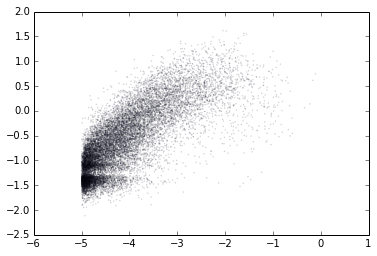

In [56]:
scatter(log10(subhalo_mass), log10(subhalo_SFR), s=0.2, alpha=0.2)